Выполнил: Кузнецов Константин  
Группа: 381906-2м

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
data_filepath = "data/kc_house_data.csv"
data = pd.read_csv(data_filepath)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
- id - unique id for each home sold
- date - date of the home sale
- price - price of each home sold
- bedrooms - number of bedrooms
- bathrooms - number of bathrooms, where 0.5 accounts for a room with a toilet but no shower
- sqft_living - square footage of the apartments interior living space
- sqft_lot - square footage of the land space
- floors - number of floors
- waterfront - a dummy variable for whether the apartment was overlooking the waterfront or not
- view - an index from 0 to 4 of how good the view of the property was
- condition - an index from 1 to 5 on the condition of the apartment
- grade - an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
- sqft_above - the square footage of the interior housing space that is above ground level
- sqft_basement - the square footage of the interior housing space that is below ground level
- yr_built - the year the house was initially built
- yr_renovated - the year of the houses's last renovation
- zipcode - what zipcode area the house is in
- lat - latitude
- long - longitude
- sqft_living15 - the square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot - the square foot of the land lots of the nearest 15 neighbors

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Отсутствуют ненулевые значения

# Преобразуем данные

In [4]:
data.drop(['id'], axis = 1, inplace=True)
data['zipcode'] = data['zipcode'].astype('category')
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Удалим дома, которые сильно отличаются по цене

In [5]:
threshold = 3 * data.price.std()
rows = []
for i in range(len(data)):
    price_mean = data.price.mean()
    price = abs(data.price.iloc[i])
    value = price_mean + threshold
    if price > value:
        rows.append(i)

data = data.drop(rows)

# Визуализируем данные

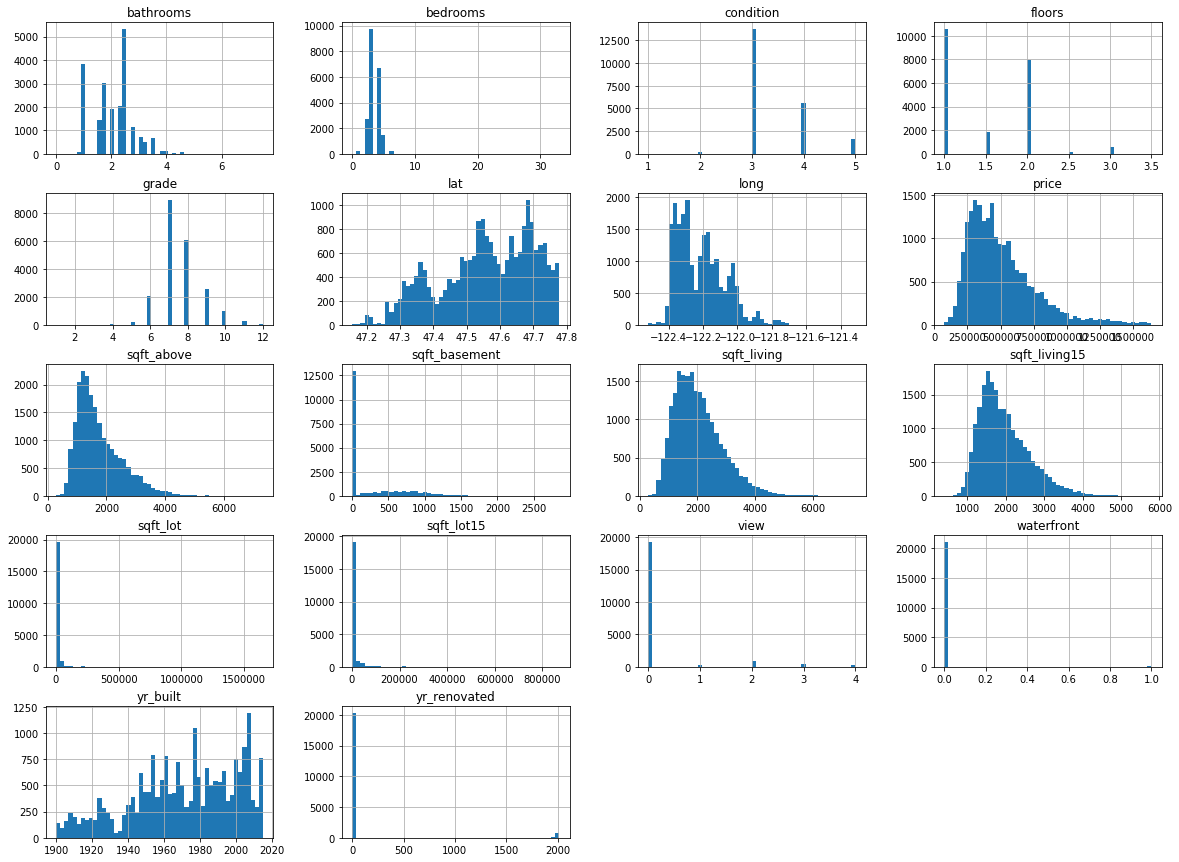

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Строим график со стоимостью домов и их расположением

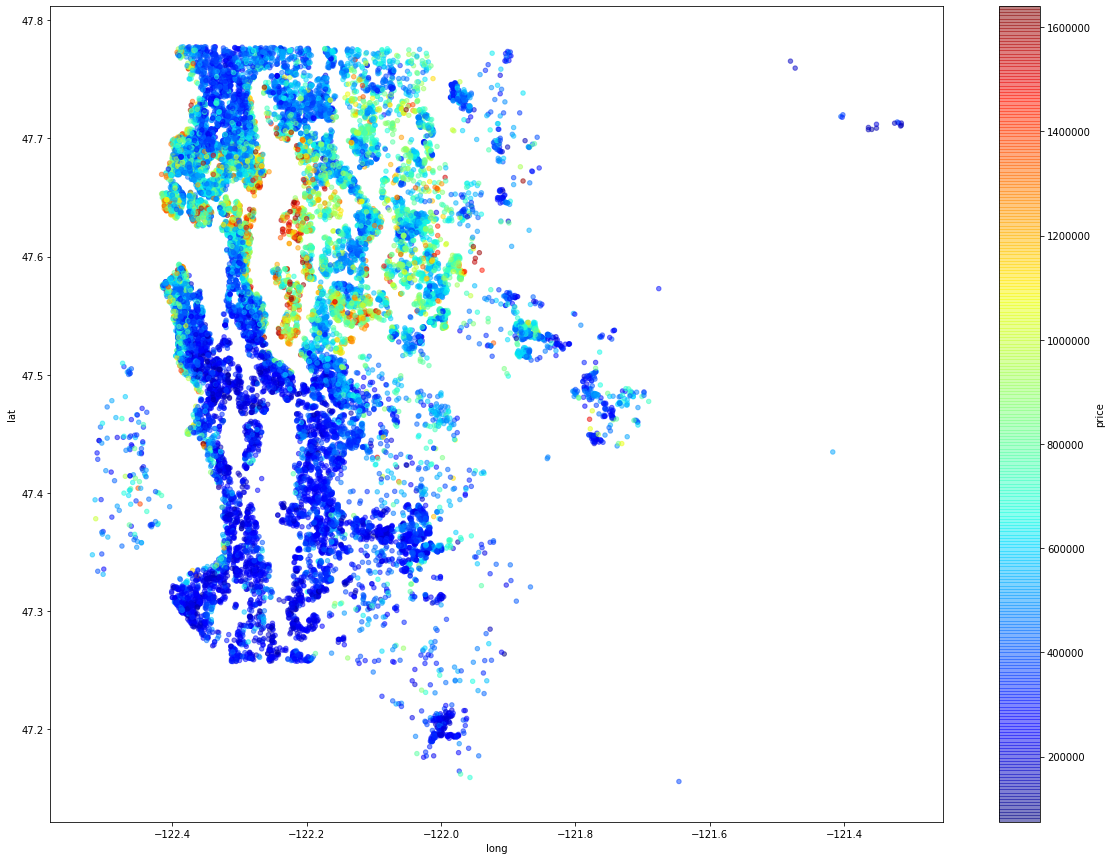

In [7]:
data.plot(kind="scatter", x="long", y="lat", alpha = 0.5, figsize=(20,15),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

Посмотрим на зависимости между данными

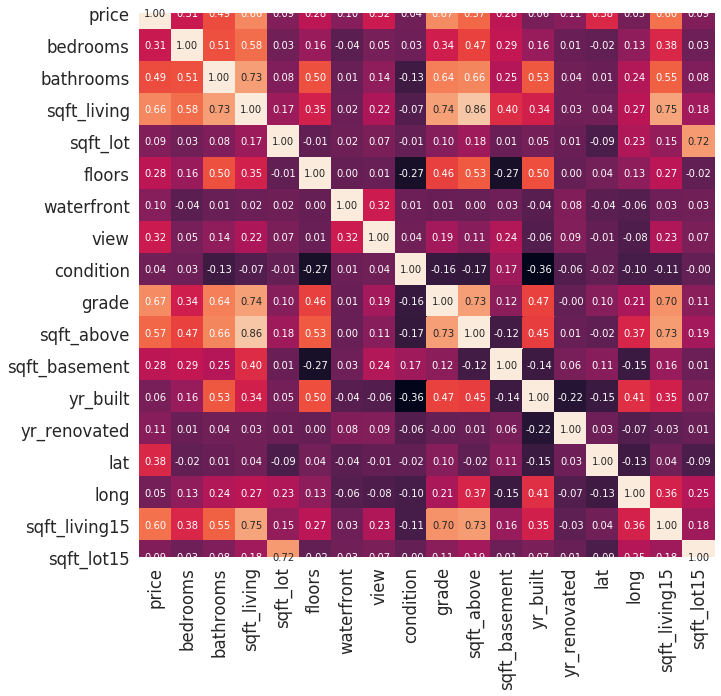

In [8]:
corr_matrix = data.corr()
seaborn.set(font_scale=1.5)
plt.figure(figsize=(15, 10))
seaborn.heatmap(corr_matrix, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [9]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
grade            0.672070
sqft_living      0.664942
sqft_living15    0.595249
sqft_above       0.567139
bathrooms        0.494776
lat              0.384907
view             0.318104
bedrooms         0.311157
sqft_basement    0.278555
floors           0.278034
yr_renovated     0.107197
waterfront       0.100946
sqft_lot         0.091307
sqft_lot15       0.087579
yr_built         0.060582
long             0.045966
condition        0.036619
Name: price, dtype: float64

Посмотрим на зависимость цены от площади дома

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


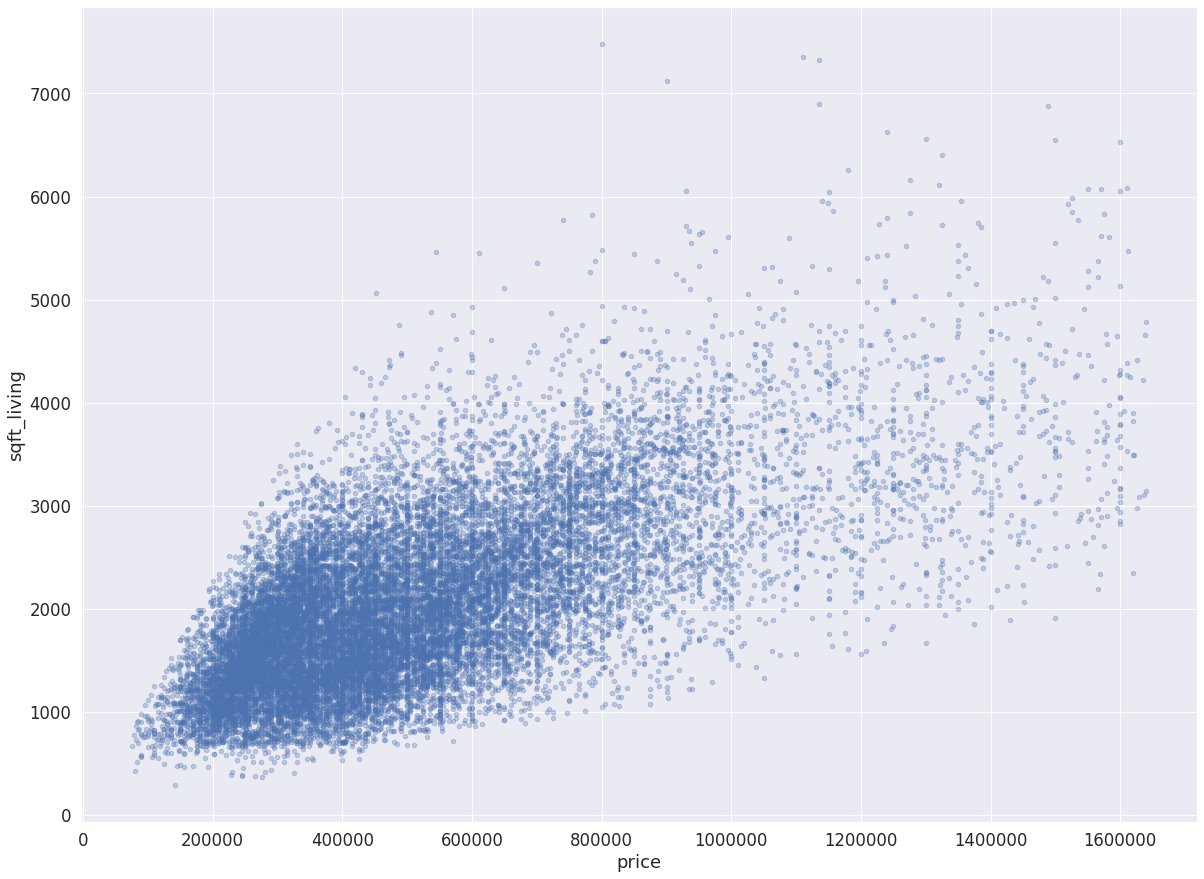

In [10]:
data.plot(kind="scatter",x="price",y="sqft_living", figsize=(20,15), alpha=0.3)

# Готовим данные

In [11]:
data.drop(['zipcode'], axis=1, inplace=True)
num_cols   = [c for c in data.columns if data[c].dtype.name != 'object']
num_data = data[num_cols]
y = num_data['price']
X = num_data.drop(['price'], axis=1)
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21207.000000,21207.000000,21207.000000,2.120700e+04,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000
mean,3.353704,2.086446,2032.091998,1.483464e+04,1.487080,0.004338,0.205640,3.407648,7.604282,1751.316829,280.775169,1970.932145,80.083227,47.558949,-122.213645,1960.339322,12642.182958
std,0.921360,0.737261,837.153739,4.041000e+04,0.538614,0.065723,0.707947,0.649105,1.111342,772.601133,425.359837,29.283480,391.694537,0.139467,0.141539,655.343610,27224.262776
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.500000,1410.000000,5.005000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,47.467000,-122.329000,1480.000000,5080.000000
50%,3.000000,2.250000,1890.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1975.000000,0.000000,47.569900,-122.231000,1820.000000,7577.000000
75%,4.000000,2.500000,2500.000000,1.049200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,540.000000,1996.000000,0.000000,47.678700,-122.124000,2330.000000,10000.000000
max,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,7320.000000,2850.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,871200.000000


Нормализуем данные

In [12]:
X = (X - X.mean()) / X.std()
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,2.120700e+04,21207.000000
mean,-9.381429e-17,2.573192e-16,1.393812e-16,-8.041225e-18,-1.608245e-16,2.177832e-17,6.969062e-17,2.197935e-16,-1.554637e-16,-4.288653e-17,8.041225e-17,-1.651132e-15,5.360817e-18,-1.089440e-13,-3.799443e-12,1.608245e-16,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-3.639949e+00,-2.829998e+00,-2.080970e+00,-3.542351e-01,-9.043212e-01,-6.600672e-02,-2.904733e-01,-3.709182e+00,-5.942618e+00,-1.891425e+00,-6.600886e-01,-2.422258e+00,-2.044533e-01,-2.889930e+00,-2.157400e+00,-2.382474e+00,-0.440459
25%,-3.838933e-01,-7.954387e-01,-7.431036e-01,-2.432477e-01,-9.043212e-01,-6.600672e-02,-2.904733e-01,-6.280161e-01,-5.437404e-01,-7.394719e-01,-6.600886e-01,-6.806618e-01,-2.044533e-01,-6.592881e-01,-8.150092e-01,-7.329580e-01,-0.277774
50%,-3.838933e-01,2.218408e-01,-1.697323e-01,-1.800208e-01,-9.043212e-01,-6.600672e-02,-2.904733e-01,-6.280161e-01,-5.437404e-01,-2.735135e-01,-6.600886e-01,1.389130e-01,-2.044533e-01,7.852309e-02,-1.226183e-01,-2.141462e-01,-0.186054
75%,7.014587e-01,5.609340e-01,5.589272e-01,-1.074645e-01,9.522972e-01,-6.600672e-02,-2.904733e-01,9.125666e-01,3.560725e-01,5.419137e-01,6.094248e-01,8.560409e-01,-2.044533e-01,8.586384e-01,6.333596e-01,5.640715e-01,-0.097053
max,3.217667e+01,7.342797e+00,6.507655e+00,4.049801e+01,3.737225e+00,1.514926e+01,5.359669e+00,2.453149e+00,3.955324e+00,7.207708e+00,6.040121e+00,1.504871e+00,4.939862e+00,1.567769e+00,6.349118e+00,5.843745e+00,31.536495


Создадим тестовую и тренировочную выборки

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# KNN (regressor)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train), knn.score(X_test, y_test))

0.888126344547509 0.7458285710955483


In [15]:
# from sklearn.model_selection import GridSearchCV
# num_neighbors = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# grid = GridSearchCV(knn, param_grid = {'n_neighbors': num_neighbors}, cv=5)
# grid.fit(X_train, y_train)

# best_cv_score = grid.best_score_
# best_n_neighbors = grid.best_estimator_.n_neighbors
# print(best_cv_score, best_n_neighbors)

In [16]:
best_n_neighbors = 10
knn = KNeighborsRegressor(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train), knn.score(X_test, y_test))

0.8325060442066146 0.7743069677030842


# KNN (classifier)

In [17]:
y = np.array(y <= 500000, dtype='int')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print(err_train, err_test)

0.08670792808723843 0.12706270627062707


In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, knn.predict(X_test)))

[[1462  256]
 [ 283 2241]]


# PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train_pca, y_train_pca)
err_train = np.mean(y_train != knn.predict(X_train_pca))
err_test  = np.mean(y_test  != knn.predict(X_test_pca))
print(err_train, err_test)

0.20076628352490422 0.24233851956624233


(1, 17)

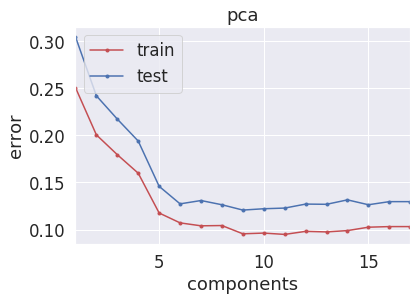

In [30]:
err_train_pca = []
err_test_pca = []
components = range(1, 18)
for n in range(1, 18):
    pca = PCA(n_components = n)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
    knn.fit(X_train_pca, y_train_pca)
    err_train_pca.append(np.mean(y_train_pca != knn.predict(X_train_pca)))
    err_test_pca.append(np.mean(y_test_pca != knn.predict(X_test_pca)))

plt.plot(components, err_train_pca, '.-r', label = 'train')
plt.plot(components, err_test_pca,  '.-b', label = 'test')    
plt.legend(loc = 2)
plt.title('pca')
plt.xlabel('components')
plt.ylabel('error')
plt.xlim([1, 17])

In [26]:
err_train_min = np.min(err_train_pca)
err_test_min = np.min(err_test_pca)
print(err_train_min, err_test_min)
print(err_test_pca.index(err_test_min) + 1)

0.09484232242852933 0.1206977840641207
9
